# Backpropagation algorithm

## Single Neuron Example

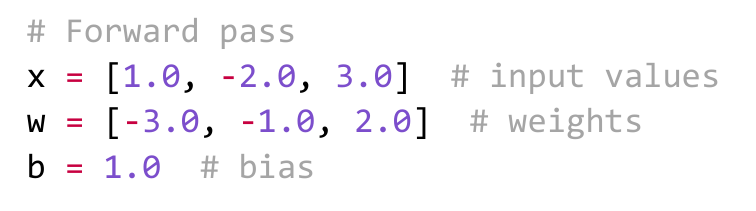

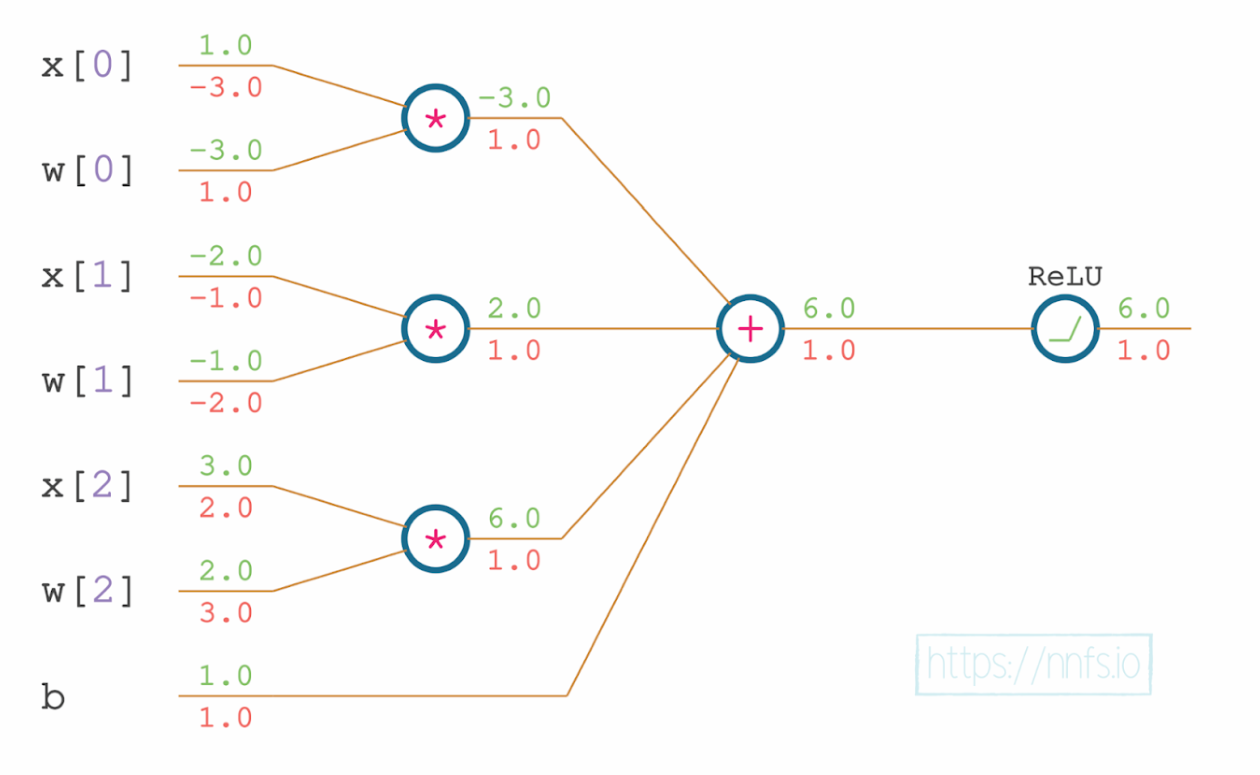

Let the inputs be $x = [x_0, x_1, x_2]$, weights $w = [w_0, w_1, w_2]$, and bias $b$.
The intermediate products are $p_i = x_i w_i$.
The pre-activation value is $z = \sum_{i=0}^{2} p_i + b = x_0 w_0 + x_1 w_1 + x_2 w_2 + b$.
The activation output is $a = \text{ReLU}(z) = \max(0, z)$.
We assume a loss $L$ such that the initial gradient is $\frac{\partial L}{\partial a} = 1$.

#### Forward Pass Values:
$$\begin{align*} x_0 &= 1.0, & w_0 &= -3.0 &\implies p_0 &= (1.0)(-3.0) = -3.0 \\ x_1 &= -2.0, & w_1 &= -1.0 &\implies p_1 &= (-2.0)(-1.0) = 2.0 \\ x_2 &= 3.0, & w_2 &= 2.0 &\implies p_2 &= (3.0)(2.0) = 6.0 \\ b &= 1.0 \\ z &= p_0 + p_1 + p_2 + b = -3.0 + 2.0 + 6.0 + 1.0 = 6.0 \\ a &= \text{ReLU}(6.0) = 6.0\end{align*}$$

#### Backward Pass (Gradients):

1.  **Gradient w.r.t. output $a$:**
    $$ \frac{\partial L}{\partial a} = 1.0 $$

2.  **Gradient w.r.t. pre-activation $z$:**
    $$ \frac{\partial a}{\partial z} = \frac{d}{dz}\text{ReLU}(z) = \begin{cases} 1 & \text{if } z > 0 \\ 0 & \text{if } z \le 0 \end{cases} $$
    Since $z=6.0 > 0$, $\frac{\partial a}{\partial z} = 1$.
    $$ \frac{\partial L}{\partial z} = \frac{\partial L}{\partial a} \frac{\partial a}{\partial z} = (1.0)(1) = 1.0 $$

3.  **Gradient w.r.t. bias $b$ and products $p_i$ (due to summation):**
    The gradient flows back through the sum node.
    $$ \frac{\partial z}{\partial b} = 1, \quad \frac{\partial z}{\partial p_i} = 1 $$
    $$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial b} = (1.0)(1) = 1.0 $$
    $$ \frac{\partial L}{\partial p_i} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial p_i} = (1.0)(1) = 1.0 \quad \text{for } i=0, 1, 2 $$

4.  **Gradient w.r.t. weights $w_i$ (due to multiplication $p_i = x_i w_i$):**
    $$ \frac{\partial p_i}{\partial w_i} = x_i $$
    $$ \frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial p_i} \frac{\partial p_i}{\partial w_i} = \frac{\partial L}{\partial p_i} x_i $$
    $$\begin{align*} \frac{\partial L}{\partial w_0} &= (1.0) x_0 = (1.0)(1.0) = 1.0 \\ \frac{\partial L}{\partial w_1} &= (1.0) x_1 = (1.0)(-2.0) = -2.0 \\ \frac{\partial L}{\partial w_2} &= (1.0) x_2 = (1.0)(3.0) = 3.0 \end{align*}$$

5.  **Gradient w.r.t. inputs $x_i$ (due to multiplication $p_i = x_i w_i$):**
    $$ \frac{\partial p_i}{\partial x_i} = w_i $$
    $$ \frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial p_i} \frac{\partial p_i}{\partial x_i} = \frac{\partial L}{\partial p_i} w_i $$
    $$\begin{align*} \frac{\partial L}{\partial x_0} &= (1.0) w_0 = (1.0)(-3.0) = -3.0 \\ \frac{\partial L}{\partial x_1} &= (1.0) w_1 = (1.0)(-1.0) = -1.0 \\ \frac{\partial L}{\partial x_2} &= (1.0) w_2 = (1.0)(2.0) = 2.0 \end{align*}$$

Final Gradients

| Parameter    | Gradient              |
|--------------|-----------------------|
| $ w[0] $   | $ \frac{\partial L}{\partial w[0]} = 1 $ |
| $ w[1] $   | $ \frac{\partial L}{\partial w[1]} = -2 $ |
| $ w[2] $   | $ \frac{\partial L}{\partial w[2]} = 3 $ |
| $ x[0] $   | $ \frac{\partial L}{\partial x[0]} = -3 $ |
| $ x[1] $   | $ \frac{\partial L}{\partial x[1]} = -1 $ |
| $ x[2] $   | $ \frac{\partial L}{\partial x[2]} = 2 $ |
| $ b $      | $ \frac{\partial L}{\partial b} = 1 $ |

## Full chain rule expression for $\frac{\partial L}{\partial x_0}$.

We trace the dependencies: $L$ depends on $a$, $a$ depends on $z$, $z$ depends on $p_0$, and $p_0$ depends on $x_0$.

We need to evaluate each term in the chain rule expression:
$$ \frac{\partial L}{\partial x_0} = \frac{\partial L}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial p_0} \frac{\partial p_0}{\partial x_0} $$

Let's substitute the definition of each function to see the derivatives explicitly:
$$ \frac{\partial L}{\partial x_0} = \left( \frac{\partial L}{\partial a} \right) \times \left( \frac{d \text{ReLU}(z)}{dz} \right) \times \left( \frac{\partial (p_0 + p_1 + p_2 + b)}{\partial p_0} \right) \times \left( \frac{\partial (x_0 w_0)}{\partial x_0} \right) $$

Evaluating each partial derivative:

*   $\frac{\partial L}{\partial a} = 1$ (This is our assumed starting gradient).
*   $\frac{\partial a}{\partial z} = \frac{d \text{ReLU}(z)}{dz}$. Since $z = 6.0 > 0$, the derivative of ReLU is $1$. So, $\frac{\partial a}{\partial z} = 1$.
*   $\frac{\partial z}{\partial p_0} = \frac{\partial (p_0 + p_1 + p_2 + b)}{\partial p_0}$. The derivative of the sum with respect to $p_0$ is $1$. So, $\frac{\partial z}{\partial p_0} = 1$.
*   $\frac{\partial p_0}{\partial x_0} = \frac{\partial (x_0 w_0)}{\partial x_0}$. The derivative of the product $x_0 w_0$ with respect to $x_0$ is $w_0$. So, $\frac{\partial p_0}{\partial x_0} = w_0$.

Substituting these back into the chain rule equation:
$$ \frac{\partial L}{\partial x_0} = (1) \times (1) \times (1) \times (w_0) = w_0 $$

Using the value $w_0 = -3.0$:
$$ \frac{\partial L}{\partial x_0} = -3.0 $$

### Chain rule:

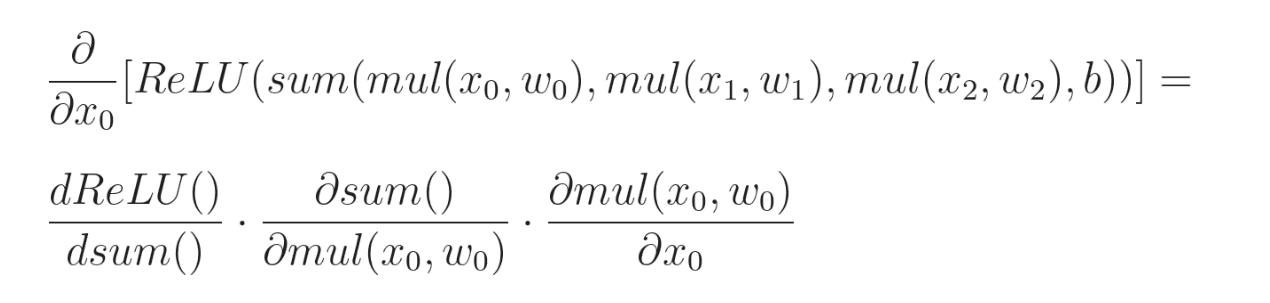

### Relu derivative

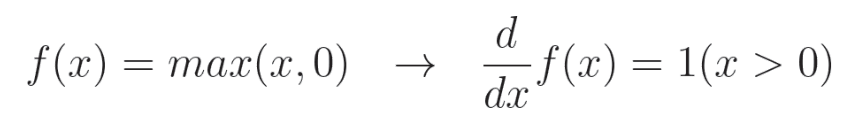

### Introducing the optimizer

For this single neuron example, we also won’t need our ​dx​. With many layers, we will continue backpropagating to preceding layers with the partial derivative with respect to our inputs.
</br>

El input data viene dado como tal, obviamente no son parámetros que puedas ajustar dentro de la red neuronal.

Entonces tienes un vector de gradientes para los weights y otro para las biases. Algo tal que así:

`dw ​= ​[drelu_dw0, drelu_dw1, drelu_dw2] = [-3,-1,2] ​# gradients on weights`
</br>
`db ​= drelu_db = 1 ​# gradients on biases`

We apply a negative fraction to this gradient since we want to decrease the final output value, and the gradient shows the direction of the steepest ascent. For example, our current weights and bias are:

Un gradiente negativo en el contexto de optimización de parámetros para una función de coste indica la dirección en la que debes mover los parámetros para reducir dicha función (es decir, mejorar el modelo si estamos entrenando uno). Esto es la base del algoritmo de gradiente descendente.

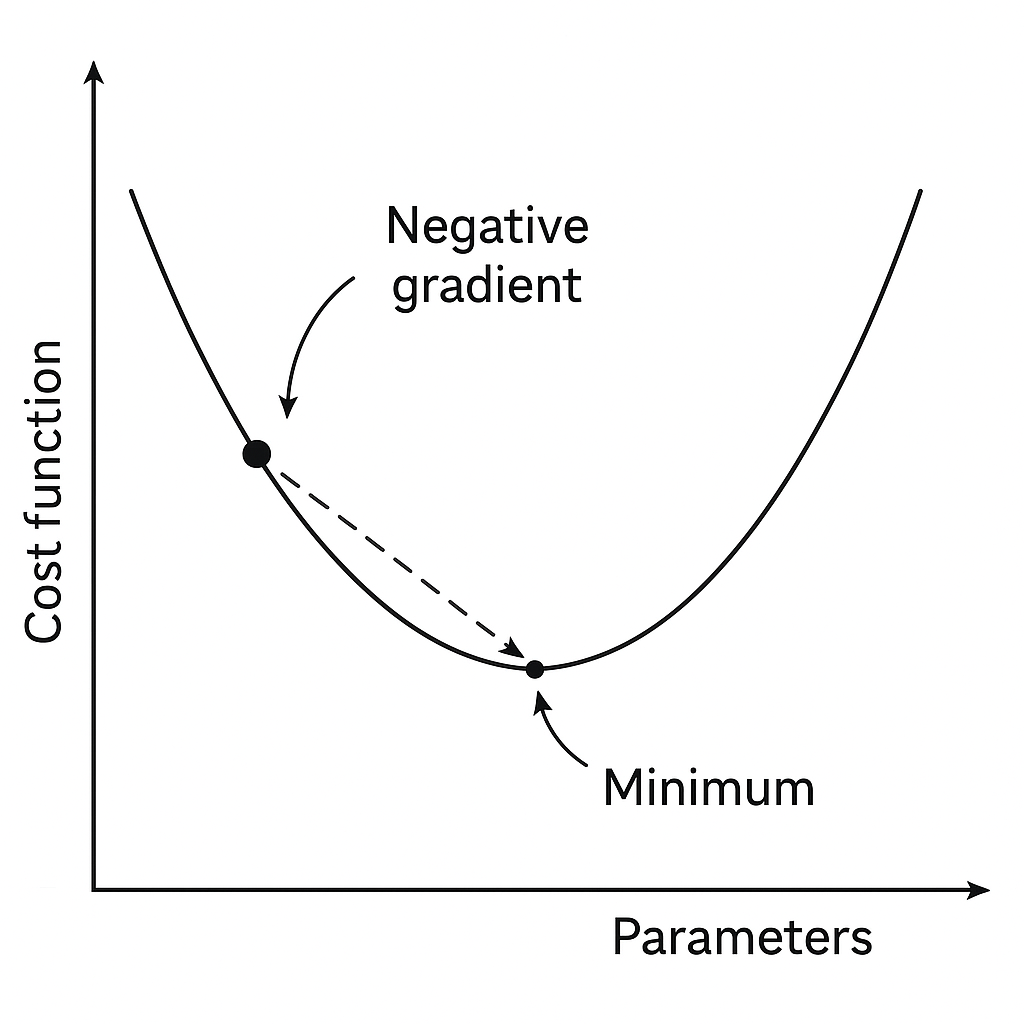

## Multiple Layer Backpropagation

In [ ]:
import numpy as np

dvalues = [1,1,1] # gradient coming from the layer to the right
weights = np.array([[0.2, 0.8, -0.5, 1], # The weights actually equals the derivative w.r.t. the input
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]]).T

# sum weights of given input and multiply by the passed in gradient for this neuron
dx0 = sum(weights[0])*dvalues[0]
dx1 = sum(weights[1])*dvalues[0]
dx2 = sum(weights[2])*dvalues[0]
dx3 = sum(weights[3])*dvalues[0]

dinputs = np.array([dx0, dx1, dx2, dx3])

# recuerda que tomar derivadas con respecto a los weights&biases no tiene ningun sentido (no tienes poder de decision sobre las muestras de entrenamiento, no nos parametros del modelo)

print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


## Neural net training

In [2]:
import numpy as np
import torch
from tools import nets
from nnfs.datasets import spiral_data

# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

### MLP Definition

In [3]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

X_tensor = torch.tensor(X, dtype=torch.float32).cuda()
y_tensor = torch.tensor(y, dtype=torch.float32).cuda()

In [4]:
dense1 = nets.Layer_Dense(2, 64, activation="relu", backend='torch')
dense2 = nets.Layer_Dense(64, 3, activation="softmax", backend='torch')

### Forward pass

In [5]:
dense1.forward(X_tensor)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1212e-04, 0.0000e+00, 5.5410e-05,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.1264e-04, 2.6490e-05, 7.9408e-05,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [0.0000e+00, 0.0000e+00, 2.2535e-03,  ..., 6.6789e-03, 0.0000e+00,
         3.4560e-03],
        [3.1354e-03, 0.0000e+00, 3.9634e-03,  ..., 1.9161e-03, 0.0000e+00,
         8.0606e-04],
        [3.2683e-03, 0.0000e+00, 4.0431e-03,  ..., 1.8000e-03, 0.0000e+00,
         7.3932e-04]], device='cuda:0')

In [17]:
print("output shape: ", dense1.output.shape)
print("output: ", dense1.output[:,-1][-30:-15])
print("output_raw: ", dense1.output_raw[:,-1][-30:-15])

output shape:  torch.Size([300, 64])
output:  tensor([0.0028, 0.0000, 0.0032, 0.0007, 0.0000, 0.0031, 0.0030, 0.0013, 0.0038,
        0.0032, 0.0050, 0.0062, 0.0065, 0.0032, 0.0051], device='cuda:0')
output_raw:  tensor([ 0.0028, -0.0042,  0.0032,  0.0007, -0.0017,  0.0031,  0.0030,  0.0013,
         0.0038,  0.0032,  0.0050,  0.0062,  0.0065,  0.0032,  0.0051],
       device='cuda:0')


In [18]:
dense2.forward(dense1.output)

tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3334],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3334],
        [0.3333, 0.3333, 0.3334],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3334, 0.3334],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3334],
        [0.3333, 0.3333, 0.3333],
        [0.333

In [23]:
loss = nets.TorchBackend.categorical_cross_entropy(nets.Backend, dense2.output, y_tensor)
# dense2.categorical_cross_entropy(y_tensor, dense2.output)

In [25]:
loss

tensor(1.0986, device='cuda:0')

In [4]:
optimizer = nets.Optimizer_SGD()

In [ ]:
optimizer.update_params(dense1)
optimizer.update_params(dense2)

In [ ]:
# Create Dense layer with 2 input features and 64 output values
# dense1 = Layer_Dense(2, 64)
# Create ReLU activation (to be used with Dense layer):
# activation1 = Activation_ReLU()
# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)
# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Create optimizer
optimizer = Optimizer_SGD()
# Train in loop
for epoch in range(10001):
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
Chapter 10 - Optimizers - Neural Networks from Scratch in Python
11
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)
if not epoch % 100:
print(f'epoch: {epoch}, ' +
f'acc: {accuracy:.3f}, ' +
f'loss: {loss:.3f}')
# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)
# Update weights and biases
optimizer.update_params(dense1)
optimizer.update_params(dense2)